In [91]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [4]:
park = pd.read_csv('data/national_park_trails.csv')

**Question 1.1 [10 points]**

What is the length in miles of the fourth longest trail in California?

In [24]:
#filter CA
CA = park[park['state_name'] == 'California']

#convert length to meters
CA['length'] = CA['length'] / 1609.34

#find the fourth longest trail
#CA.sort_values(by = ["length"], ascending=False).head()

#OR CAN DO
CA.sort_values('length', ascending=False).iloc[3]

#BIG SEKI Loop: 145.2 miles

<positron-console-cell-24>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


trail_id                                                      10418330
name                                                     Big SEKI Loop
area_name                                   Kings Canyon National Park
city_name                                                         Hume
state_name                                                  California
country_name                                             United States
_geoloc                           {'lat': 36.79608, 'lng': -118.58322}
popularity                                                      2.1531
length                                                           145.2
elevation_gain                                              10944.7584
difficulty_rating                                                    7
route_type                                                        loop
visitor_usage                                                      1.0
avg_rating                                                         5.0
num_re

**Question 1.2 [10 points]**

Consider an “easy” trail to be one that has an elevation gain of less than 500 meters, a distance of less than 5 kilometers, and a difficulty rating below 4.

Which California National Park has the highest average rating of its “easy” trails?

In [29]:
#convert length to km
CA['length'] = CA['length'] * 1.60934

#convert difficulty to be float


#filter trail to be elevation < 500, distance < 5 kilo, difficulty < 4
CA_filtered = CA[(CA['elevation_gain'] < 500.0) & (CA['length'] < 5.0) & (CA['difficulty_rating'] < 4.0)]

#find the highest highest avg rating of CA_filtered
CA_filtered.sort_values('avg_rating', ascending=False).iloc[0]
#name: Saline Valley Hot Spring
#avg_rating: 5.0 


<positron-console-cell-29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


trail_id                                         10024378
name                             Saline Valley Hot Spring
area_name                      Death Valley National Park
city_name                                       Lone Pine
state_name                                     California
country_name                                United States
_geoloc              {'lat': 36.83402, 'lng': -117.73855}
popularity                                         6.1221
length                                           3.238622
elevation_gain                                        0.0
difficulty_rating                                       1
route_type                                   out and back
visitor_usage                                         1.0
avg_rating                                            5.0
num_reviews                                             4
features               ['dogs-no', 'kids', 'hot-springs']
activities                          ['hiking', 'walking']
units         

**Question 1.3 [15 points]**

How many National Parks contain the word “Land” somewhere in their name? (if the word appears as part of a longer word, like “Candyland”, this counts too)

In [49]:
park_list = park['name']
land_list_1 = list(map(lambda x: x.find("Land"), park_list))
land_list_2 = list(map(lambda x: x.find("land"), park_list))

import numpy as np

land_array_1 = np.array(land_list_1)
store1 = len(land_array_1[land_array_1 != -1])

land_array_2 = np.array(land_list_2)
store2 = len(land_array_2[land_array_2 != -1])

store1 + store2

#7 contain land

61

**Question 1.4 [15 points]**

Consider the following plot, made from a dataset called np_trails_new. Although you can see the code that made the plot, you do not see the code that made the np_trails_new object.

Your job in this question is to create the np_trails_new object. You’ll know when you have succeeded, because the code provided will produce the plot.

In Canvas, turn in the values of the first row of the np_trails_new object.

(If your dataset has more columns than seem to be available, only include the ones that were absolutely necessary to keep in this analysis.)

In [ ]:
#** IDK **
park_new = park

In [51]:
from plotnine import ggplot, aes, geom_density, facet_wrap, ggtitle

(ggplot(park, aes(x="score"))
+ geom_density()
+ facet_wrap('~ measure', scales = 'free') 
+ ggtitle("Overall distribution of various trail scores in National parks")
)

PlotnineError: 'At least one layer must contain all variables used for facetting'

**Question 1.5 [20 points]**

Recreate the plot below, by filling in the blanks in the code on Canvas.

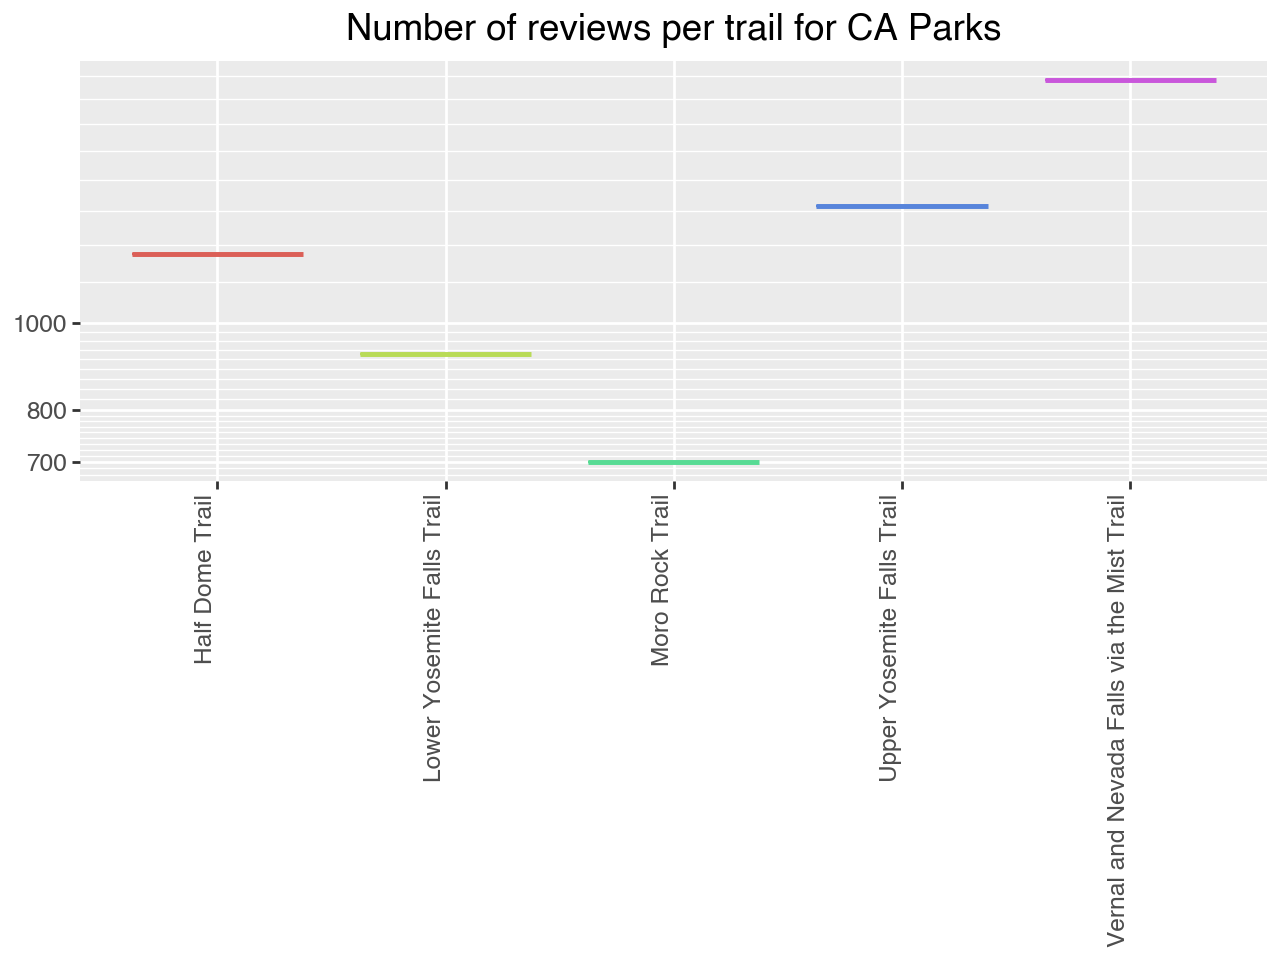

In [59]:
#** IDK **
#pick like a few CA vals?

from plotnine import geom_boxplot, aes, labs, element_text, ggplot, theme
from plotnine.scales import scale_color_discrete, scale_y_log10

(ggplot(CA.head(), aes(x="name", y="num_reviews", color = "name"))
+ geom_boxplot()
+ scale_y_log10() 
+ scale_color_discrete(guide=None)
+ labs(
  x = "",
  y = "",
  title = "Number of reviews per trail for CA Parks"
)
#+ ______()
+ theme(axis_text_x=element_text(rotation=45, hjust=1)) 
)

**Question 2.1 [30 points]**

Write a functions to help recommend trails to a user. The function will have as its input the dataset and the name of a National Park, and the following optional arguments:

A minimum trail elevation gain (in meters)
A maximum trail elevation gain (in meters)
A minimum trail rating
The type of trail
(Note: “optional” here means that the function can run even if the user doesn’t supply these arguments, not that they are optional for you to include in your function definition.)

The function should return all the trails that fit the supplied criteria. You may assume that the variable names of any inputted dataset match the np_trails dataset.

Here is some starter code for this function:

In [141]:
def recommend_trails(dataset, name=None, min_elev=None, max_elev=None, min_rating=None, trail_type=None):
    # Default values if None is provided
    if min_elev is None:
        min_elev = 0
    if max_elev is None:
        max_elev = 10000000
    if min_rating is None:
        min_rating = 0

    # Filter by elevation gain and rating
    trails = dataset[
        (dataset['elevation_gain'] > min_elev) & 
        (dataset['elevation_gain'] < max_elev) & 
        (dataset['avg_rating'] > min_rating)
    ]

    # Filter by trail type if provided
    if trail_type is not None:
        trails = trails[trails['route_type'].str.lower() == trail_type.lower()]

    # Filter by name if provided
    if name is not None:
        trails = trails[trails['name'] == name]

    return trails

# Unit test
recommend_trails(park, trail_type='loop').head()


,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
7,10236075,Taiga Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73043, 'lng': -148.91922}",5.9038,2574.944,62.7888,3,loop,1.0,4.0,27,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
8,10236084,McKinley Station Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73324, 'lng': -148.89659}",5.8885,4667.086,113.9952,1,loop,1.0,4.5,21,"['dogs-no', 'forest', 'kids', 'views', 'wild-f...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
9,10327620,Mount Thorofare Ridge Loop,Denali National Park,Cantwell,Alaska,United States,"{'lat': 63.43108, 'lng': -150.31096}",5.7990,6598.294,507.7968,5,loop,1.0,4.5,5,"['forest', 'views', 'wild-flowers', 'wildlife']",['hiking'],i
11,10333556,Tiaga Loop and Horseshoe Lake Trail to Beaver Dam,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73128, 'lng': -148.9171}",4.6043,4828.020,158.8008,3,loop,2.0,4.5,15,"['dogs-no', 'forest', 'lake', 'views']","['birding', 'hiking', 'nature-trips', 'walking']",i


In [142]:
#unit test
recommend_trails(park, trail_type = 'loop').head()

#store = 'loop'

#park[park['route_type'] == store]

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
7,10236075,Taiga Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73043, 'lng': -148.91922}",5.9038,2574.944,62.7888,3,loop,1.0,4.0,27,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
8,10236084,McKinley Station Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73324, 'lng': -148.89659}",5.8885,4667.086,113.9952,1,loop,1.0,4.5,21,"['dogs-no', 'forest', 'kids', 'views', 'wild-f...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
9,10327620,Mount Thorofare Ridge Loop,Denali National Park,Cantwell,Alaska,United States,"{'lat': 63.43108, 'lng': -150.31096}",5.7990,6598.294,507.7968,5,loop,1.0,4.5,5,"['forest', 'views', 'wild-flowers', 'wildlife']",['hiking'],i
11,10333556,Tiaga Loop and Horseshoe Lake Trail to Beaver Dam,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73128, 'lng': -148.9171}",4.6043,4828.020,158.8008,3,loop,2.0,4.5,15,"['dogs-no', 'forest', 'lake', 'views']","['birding', 'hiking', 'nature-trips', 'walking']",i


**Question 2.2 [30 points]**

It’s reasonable to think we might also want to search for hikes according to climate. Therefore, we will scrape the average temperatures for each U.S. state from the following website:

https://www.extremeweatherwatch.com/us-state-averages
Write a function that takes one optional arguent, month.

The function should scrape the temperature website above for the desired month. If no month is specified then it should scrape the overall average temperatures. The function should return a data frame of the temperatures for the specified month in the names of the temperature columns.

Here is some starter code for this function:

In [147]:
def scrape_temps(month = None):

  if month is None:
    my_url = "https://www.extremeweatherwatch.com/us-state-averages/"
  else: 
    my_url = "https://www.extremeweatherwatch.com/us-state-averages/month-{month}".format(month=month)


  response = requests.get(my_url)
  soup = BeautifulSoup(response.content, "html.parser")
    
  table = soup.find("table")

  #turn html into actual dataframe

  # initialize an empty list
  rows = []

  # iterate over all rows in the city table
  #we do 1: b/c there is only 1 header row in this data
  for city in table.find_all("tr")[1:]:

      # Get all the cells (<th>) and (<td>) in the row.
      cells = city.find_all("td")
      
      # which for most state is contained in the <a> tag
      state_tag = cells[0].find("a") or cells[0]
      state = state_tag.text.strip()

      # which for most state is contained in the <a> tag
      high_tag = cells[0].find("td") or cells[1]
      high = high_tag.text.strip()
      
      # which for most state is contained in the <a> tag
      low_tag = cells[0].find("td") or cells[2]
      low = low_tag.text.strip()

      # which for most state is contained in the <a> tag
      precip_tag = cells[0].find("td") or cells[3]
      precipitation = precip_tag.text.strip()

      # Append this data.
      rows.append({
              "state_name": state,
              "high": high,
              "low": low,
              "precipitation": precipitation
      })

  df = pd.DataFrame(rows)

  df['high'] = pd.to_numeric(df['high'])
  df['low'] = pd.to_numeric(df['low'])
  df['precipitation'] = pd.to_numeric(df['precipitation'])

  return df

In [123]:
#unit test
scrape_temps(month = 'january').head()

,city,high,low,Precipitation
0,Alabama,56.1,34.5,5.3
1,Alaska,10.7,-2.4,2.8
2,Arizona,55.7,30.6,1.2
3,Arkansas,50.0,30.5,3.8
4,California,54.6,35.0,4.1


**Question 2.3 [20 points]**

I am looking for a trail that is:

1000-3000 meters of elevation (I like mountains, but not too big.)

Rated at least a 4.5 on average

A loop trail (I don’t like to retrace my steps)

Not too cold in the summer, even at the peak

a. Use your recommend_trails function to find me a few good options.

b. Use your second function (scrape_temps) to gather information on temperatures for the summer months (i.e. May, June, July, August) in the states for these trails.

c. Merge these two datasets, so I can see all the recommended trails alongside their summer temps. If you were unable to scrape the information from the website, then feel free to import the temp_data.csv file and use average temperatures instead of summer temperatures to complete this question.

d. Convert the temperatures of the states to be the temperatures at the peak elevation of my recommended hikes. The temperature decreases by about 5.4 degrees Fahrenheit (or 9.8 degrees Celsius) for every 1000 feet you go up in elevation



In [151]:
#a
#1000-3000 meters of elevation
#Rated at least a 4.5 on average
#A loop trail

part_a = recommend_trails(dataset = park, min_elev=1000, max_elev=3000, min_rating = 4.5, trail_type = 'loop')

#b gather temps for may, june, july, august for states of these trails
months = ['may', 'june', 'july', 'august']
part_b = list(map(lambda i: scrape_temps(i), months))
part_b = pd.concat(part_b, ignore_index=True)

#c merge datasets (for states of these trails, so left join?)
merged_df = pd.merge(part_a, part_b, how='left', on='state_name')

#d temp decreases 5.4 F for every 1000 ft elevation
merged_df['high'] = merged_df['high'] - (5.4 * (merged_df['elevation_gain'] / 1000))
merged_df['low'] = merged_df['low'] - (5.4 * (merged_df['elevation_gain'] / 1000))

**“Interview” Questions**

The 2024 Exam will also include some questions about python programming and data wrangling in general, that do not relate to the given dataset. These are meant to mimic the style of questions you might see in an interview for an analytics position.

Example question
The pandas library introduces a new data structure, the data frame. How is this different than basic python object structures, and what are the advantages of the data frame structure over these?

In [ ]:
#the pandas data frame is different than basic python object structures because:

# we have a 2D array of arrays
# each column can be a different object type (unlike matrices)
# there are many functions that are easily integrated in these df
# you can call each column/row which is good for manipulation